#Daily Challenge : Comprehensive Mobile Price Analysis

##Data Loading and Exploration:

In [2]:
#Reviewing the data structure and identifying the size of the dataset, if there Nan Value, and if there duplicates

import pandas as pd

train_df = pd.read_csv('train.csv')
print(train_df.head())
print(train_df.info())
print(train_df.describe())
print(train_df.isna().sum())
print(train_df.duplicated().sum())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

##2. Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.

There is no need here, no missing values or NaN value and the columns are already in a suitable format

##3. Statistical Analysis with NumPy and SciPy:

In [3]:
mean = train_df.mean()
median = train_df.median()
std_dev = train_df.std()
mode = train_df.mode().iloc[0]
variance = train_df.var()
range = train_df.max() - train_df.min()



In [4]:
stats_summary = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std_dev,
    'Mode': mode,
    'Variance': variance,
    'Range': range
})

print(stats_summary)

                     Mean  Median  Standard Deviation    Mode      Variance  \
battery_power  1238.51850  1226.0          439.418206   618.0  1.930884e+05   
blue              0.49500     0.0            0.500100     0.0  2.501001e-01   
clock_speed       1.52225     1.5            0.816004     0.5  6.658629e-01   
dual_sim          0.50950     1.0            0.500035     1.0  2.500348e-01   
fc                4.30950     3.0            4.341444     0.0  1.884813e+01   
four_g            0.52150     1.0            0.499662     1.0  2.496626e-01   
int_memory       32.04650    32.0           18.145715    27.0  3.292670e+02   
m_dep             0.50175     0.5            0.288416     0.1  8.318353e-02   
mobile_wt       140.24900   141.0           35.399655   182.0  1.253136e+03   
n_cores           4.52050     4.0            2.287837     4.0  5.234197e+00   
pc                9.91650    10.0            6.064315    10.0  3.677592e+01   
px_height       645.10800   564.0          443.78081

In [5]:
# Calcul de l'asymétrie (skewness) et de la kurtosis pour chaque colonne
skewness = train_df.skew()
kurtosis = train_df.kurt()

# Organiser les résultats dans un tableau
distribution_shapes = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

# Afficher les résultats
print(distribution_shapes)


               Skewness  Kurtosis
battery_power  0.031898 -1.224144
blue           0.020016 -2.001602
clock_speed    0.178084 -1.323417
dual_sim      -0.038035 -2.000555
fc             1.019811  0.277076
four_g        -0.086144 -1.994575
int_memory     0.057889 -1.216074
m_dep          0.089082 -1.274349
mobile_wt      0.006558 -1.210376
n_cores        0.003628 -1.229750
pc             0.017306 -1.171499
px_height      0.666271 -0.315865
px_width       0.014787 -1.186005
ram            0.006628 -1.191913
sc_h          -0.098884 -1.190791
sc_w           0.633787 -0.389523
talk_time      0.009512 -1.218591
three_g       -1.228142 -0.492161
touch_screen  -0.012009 -2.001859
wifi          -0.028024 -2.001217
price_range    0.000000 -1.360400


Skewness :

A positive skewness indicates that the majority of values ​​are concentrated in the lower part, with a longer tail on the right.
A negative skewness indicates that the majority of values ​​are concentrated in the upper part, with a longer tail on the left.

Kurtosis :

A kurtosis > 3 indicates that the distribution has more extreme values ​​than normal (example: financial distributions with sudden changes).
A kurtosis < 3 indicates a flatter distribution, where extreme values ​​are rare.

Investigate feature-target correlation usign scipy

In [6]:
from scipy.stats import pearsonr, spearmanr

# create a features columns list
features = ['battery_power', 'ram', 'talk_time', 'int_memory', 'px_height', 'px_width', 'mobile_wt', 'clock_speed']

# initialize a dictionnary to stock the results
correlation_results = {'Feature': [], 'Pearson Coefficient': [], 'Pearson P-value': [],
                       'Spearman Coefficient': [], 'Spearman P-value': []}

# calculate the correaltion for every features compared to the target
for feature in features:
    # Pearson Correlation
    pearson_corr, pearson_p = pearsonr(train_df[feature], train_df['price_range'])

    # Spearman Correlation
    spearman_corr, spearman_p = spearmanr(train_df[feature], train_df['price_range'])

    # stocking the results
    correlation_results['Feature'].append(feature)
    correlation_results['Pearson Coefficient'].append(pearson_corr)
    correlation_results['Pearson P-value'].append(pearson_p)
    correlation_results['Spearman Coefficient'].append(spearman_corr)
    correlation_results['Spearman P-value'].append(spearman_p)

# convert the result in data frame for clarity
correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)


         Feature  Pearson Coefficient  Pearson P-value  Spearman Coefficient  \
0  battery_power             0.200723     1.264854e-19              0.199991   
1            ram             0.917046     0.000000e+00              0.917080   
2      talk_time             0.021859     3.285375e-01              0.022138   
3     int_memory             0.044435     4.693006e-02              0.044278   
4      px_height             0.148858     2.227806e-11              0.131884   
5       px_width             0.165818     8.478969e-14              0.165134   
6      mobile_wt            -0.030302     1.755393e-01             -0.030214   
7    clock_speed            -0.006606     7.678151e-01             -0.005436   

   Spearman P-value  
0      1.722306e-19  
1      0.000000e+00  
2      3.224067e-01  
3      4.771653e-02  
4      3.215011e-09  
5      1.074056e-13  
6      1.767996e-01  
7      8.080353e-01  


##4. Data Visualization with Matplotlib:

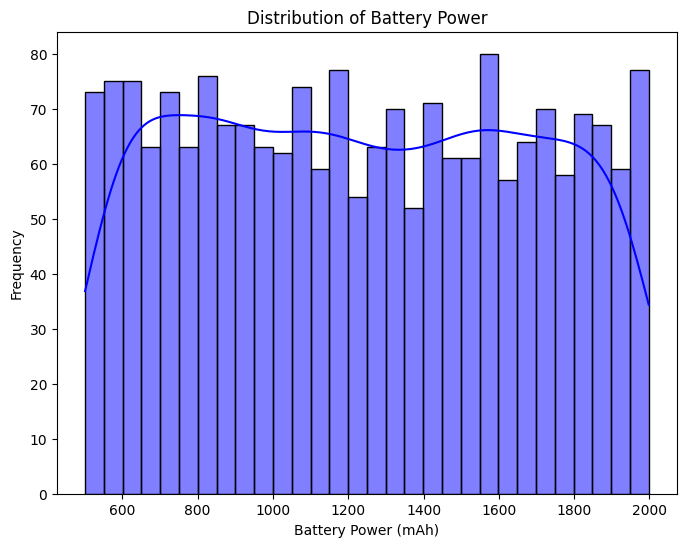

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram for 'battery_power'
plt.figure(figsize=(8, 6))
sns.histplot(train_df['battery_power'], kde=True, bins=30, color='blue')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()


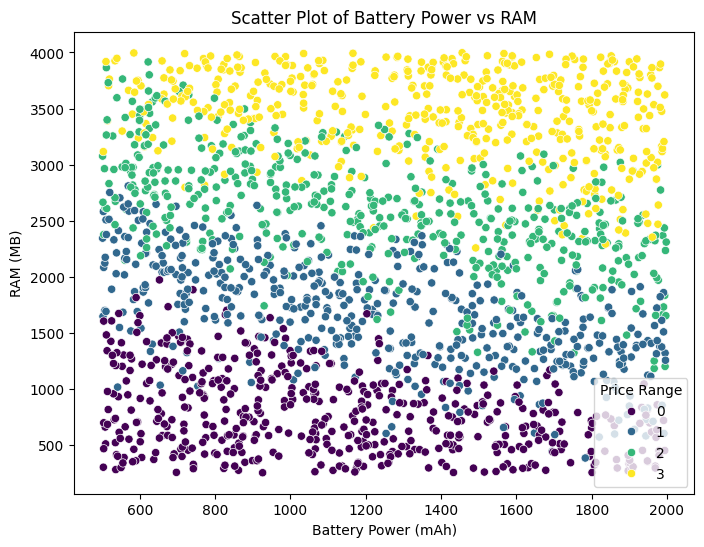

In [12]:
# catter plot for 'battery_power' and 'ram'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['battery_power'], y=train_df['ram'], hue=train_df['price_range'], palette='viridis')
plt.title('Scatter Plot of Battery Power vs RAM')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('RAM (MB)')
plt.legend(title='Price Range')
plt.show()


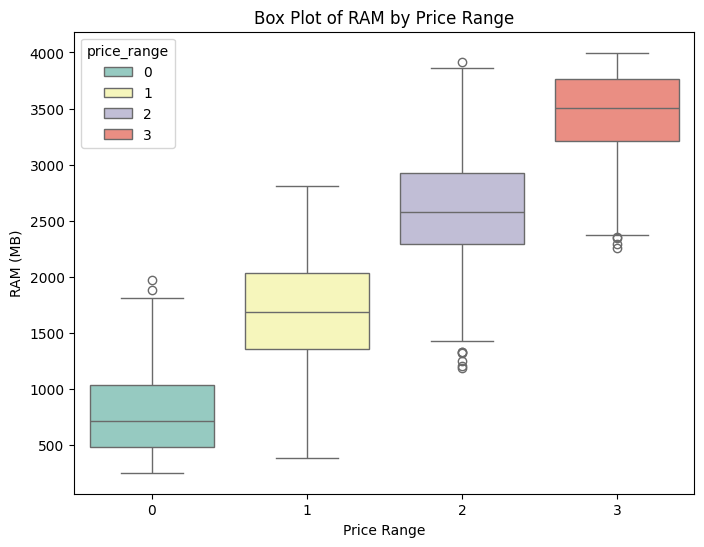

In [21]:
#Box plot for 'ram' compare to 'price_range'
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='ram', data = train_df,hue='price_range',palette='Set3')
plt.title('Box Plot of RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

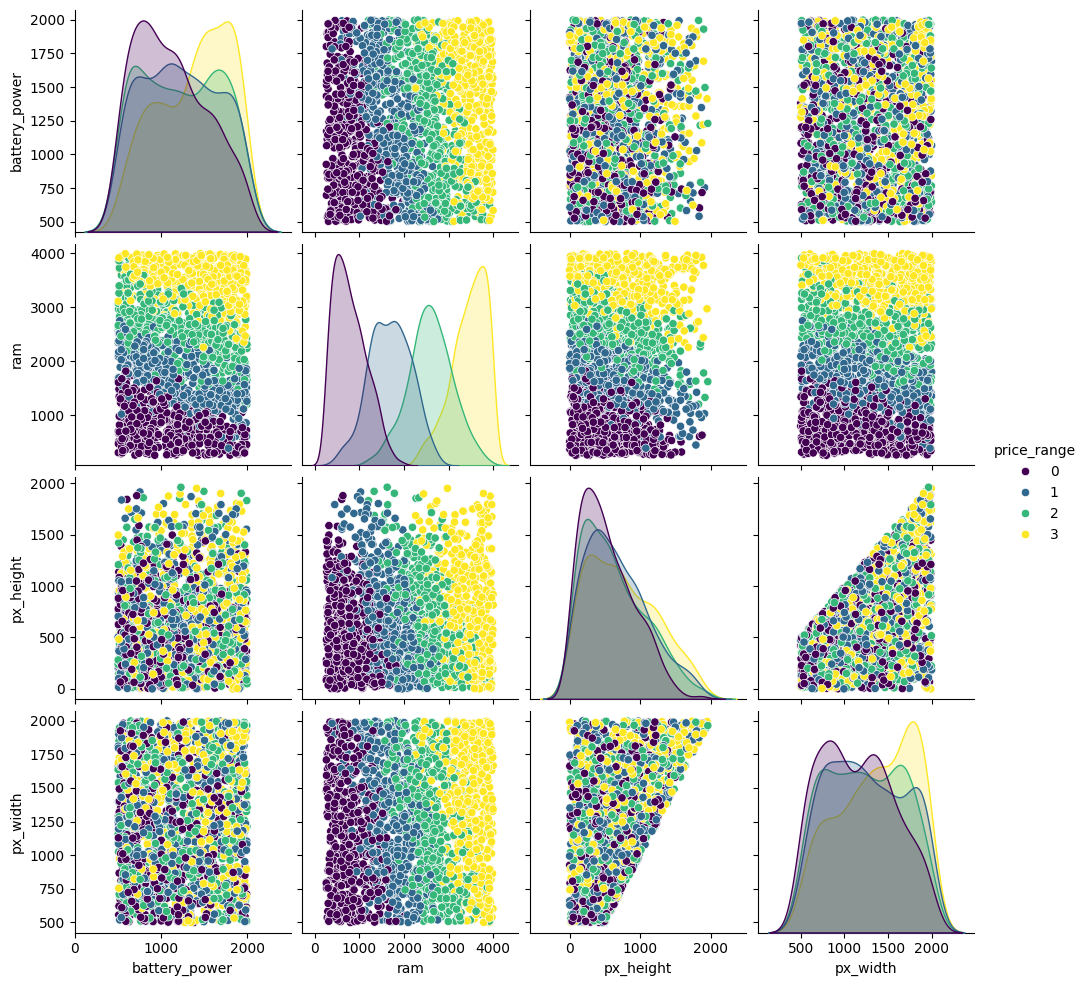

In [15]:
#pair plot
subset = ['battery_power', 'ram', 'price_range', 'px_height', 'px_width']
sns.pairplot(train_df[subset], hue='price_range', palette='viridis', diag_kind='kde')
plt.show()

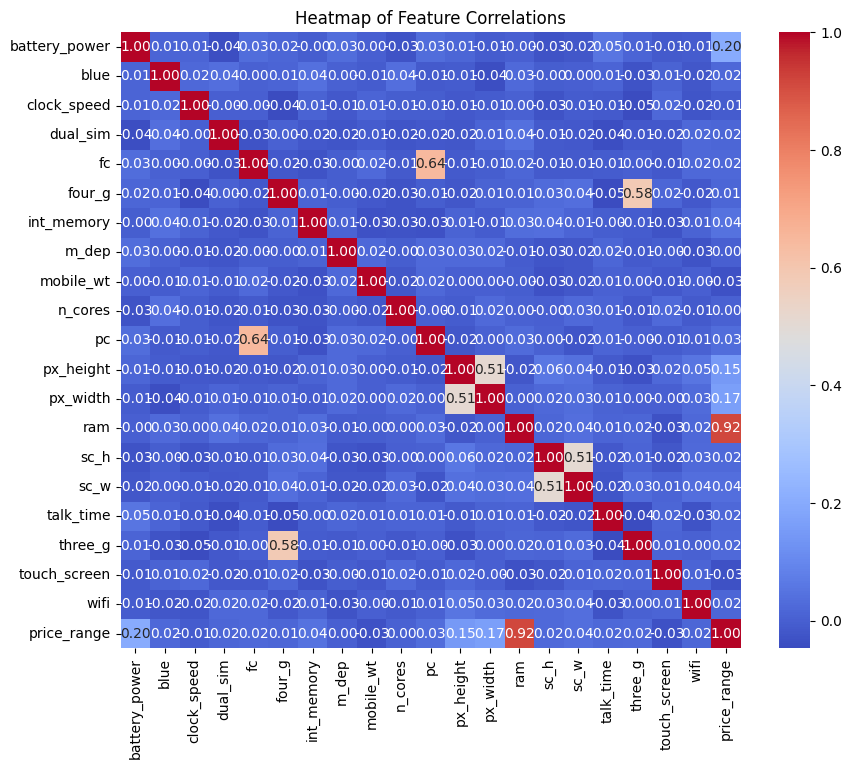

In [22]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

##5. Insight Synthesis and Conclusion:


Average: Phones have an average battery capacity of around 1200 mAh, with a wide variation between low-end and high-end models.
Phones in higher price categories (3 and 4) tend to have batteries with higher capacities.

RAM:

This is the key determinant of price category: Phones with more RAM (around 3 GB or more) generally fall into price categories 3 and 4.